In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [3]:
df['time']=df['Date/Time'].apply(lambda x : x[-8:-1])
df['month']=df['Date/Time'].apply(lambda x : x[0])
df['day']=df['Date/Time'].apply(lambda x : x[2])
df['day']=df['day'].apply(lambda x : '-'+x)
df['month']=df['month'].apply(lambda x : '-'+x)
df['year']='2014'
df['date']=df['year']+df['month']+df['day']
df.drop(columns=['day','month','year'],inplace=True)
df.head()

,Date/Time,Lat,Lon,Base,time,date
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512,0:03:0,2014-8-1
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512,0:09:0,2014-8-1
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512,0:12:0,2014-8-1
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512,0:12:0,2014-8-1
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512,0:12:0,2014-8-1


In [4]:
df.drop(columns=['Date/Time'],inplace=True)
df['hour']=df['time'].apply(lambda x : x[0:2])
df['hour']=df['hour'].astype('int64')
df.drop(columns=['time'],inplace=True)
df['date']=df['date'].astype('datetime64')
df.head()

,Lat,Lon,Base,date,hour
0,40.7366,-73.9906,B02512,2014-08-01,0
1,40.7260,-73.9918,B02512,2014-08-01,0
2,40.7209,-74.0507,B02512,2014-08-01,0
3,40.7387,-73.9856,B02512,2014-08-01,0
4,40.7323,-74.0077,B02512,2014-08-01,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Lat     829275 non-null  float64       
 1   Lon     829275 non-null  float64       
 2   Base    829275 non-null  object        
 3   date    829275 non-null  datetime64[ns]
 4   hour    829275 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
sns.set_style('darkgrid')

# SCATTER PLOT

 The relationship between Latitude and Longitude plotted with the help of SCATTERPLOT to analyze the distribution of Cab Bookings in NEW-YORK

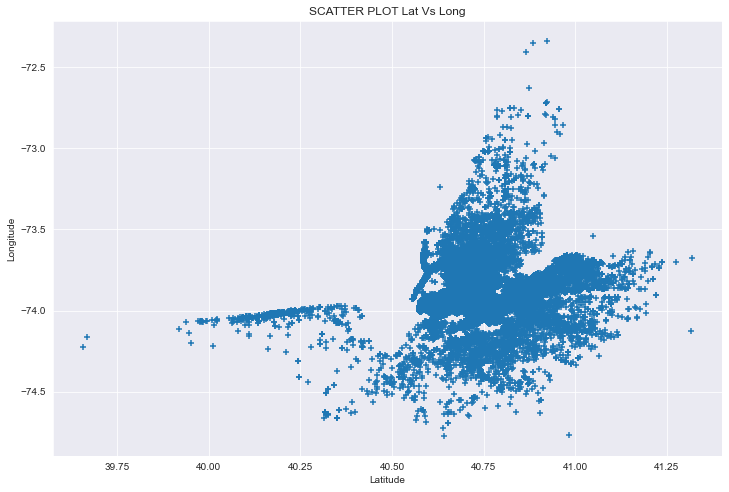

In [7]:
plt.figure(figsize=(12,8))
plt.title('SCATTER PLOT Lat Vs Long')
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.scatter(df['Lat'],df['Lon'],marker='+')
plt.show()

In [8]:
from sklearn.cluster import KMeans

In [9]:
df.head()

,Lat,Lon,Base,date,hour
0,40.7366,-73.9906,B02512,2014-08-01,0
1,40.7260,-73.9918,B02512,2014-08-01,0
2,40.7209,-74.0507,B02512,2014-08-01,0
3,40.7387,-73.9856,B02512,2014-08-01,0
4,40.7323,-74.0077,B02512,2014-08-01,0


In [10]:
sse=[]
for k in range(1,20):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit_predict(df[['Lat','Lon']])
    sse.append(kmeans.inertia_)  

# ELBOW PLOT

To find a correct value of K based on Sum of Squared Errors versus Number of Clusters to create a model model which is neither overfitted nor underfitted. 

The value of K should be taken at the point of rapid change.(the shape of the plot around this region will be bent like a elbow) 

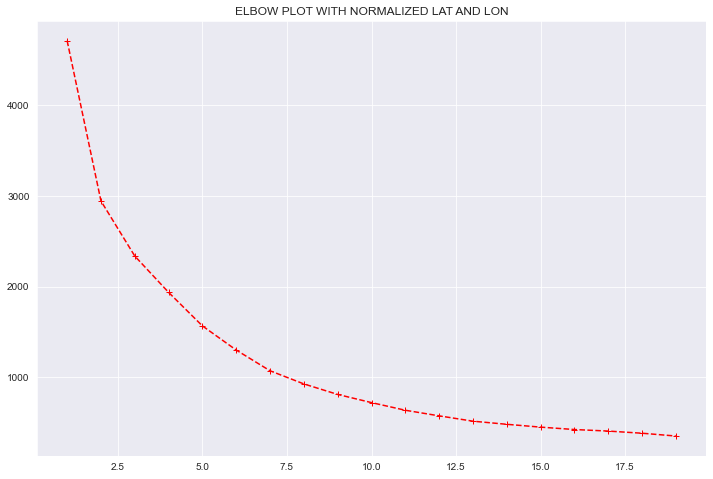

In [11]:
plt.figure(figsize=(12,8))
plt.title('ELBOW PLOT WITH NORMALIZED LAT AND LON')
plt.plot(range(1,20),sse,'r+--')
plt.show()

In [12]:
kmeans=KMeans(n_clusters=7)
a=kmeans.fit_predict(df[['Lat','Lon']])
centroid= kmeans.cluster_centers_

In [13]:
df['BASE']=a
df.head()

,Lat,Lon,Base,date,hour,BASE
0,40.7366,-73.9906,B02512,2014-08-01,0,4
1,40.7260,-73.9918,B02512,2014-08-01,0,4
2,40.7209,-74.0507,B02512,2014-08-01,0,4
3,40.7387,-73.9856,B02512,2014-08-01,0,4
4,40.7323,-74.0077,B02512,2014-08-01,0,4


# SCATTER PLOT AFTER CLUSTERING. 

THE NUMBER OF CLUSTERS,K=7 IS CHOSEN. THE 7 CLUSTERS ARE REPRESENTED WITH DIFFERENT COLORS IN THE SCATTERPLOT PROVIDED BELOW.

THE CENTROIDS OF EACH CLUSTERS ARE MARKED WITH BLACK(CIRCLE) DOTS.

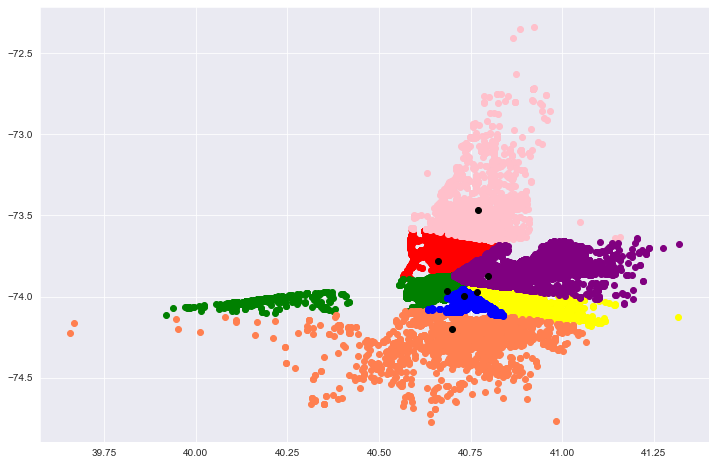

In [14]:
a=df[df['BASE']==0]
b=df[df['BASE']==1]
c=df[df['BASE']==2]
d=df[df['BASE']==3]
e=df[df['BASE']==4]
f=df[df['BASE']==5]
g=df[df['BASE']==6]
plt.figure(figsize=(12,8))
plt.scatter(a['Lat'],a['Lon'],color='red')
plt.scatter(b['Lat'],b['Lon'],color='yellow')
plt.scatter(c['Lat'],c['Lon'],color='green')
plt.scatter(d['Lat'],d['Lon'],color='coral')
plt.scatter(e['Lat'],e['Lon'],color='blue')
plt.scatter(f['Lat'],f['Lon'],color='pink')
plt.scatter(g['Lat'],g['Lon'],color='purple')
for i in range (7):
    plt.scatter(centroid[i][0],centroid[i][1],color='black')
plt.show()

In [15]:
centroid

array([[ 40.66115001, -73.782578  ],
       [ 40.76720813, -73.97140864],
       [ 40.6864661 , -73.96312   ],
       [ 40.69997732, -74.20075322],
       [ 40.73109886, -73.9977348 ],
       [ 40.7698872 , -73.46585604],
       [ 40.79864131, -73.87470923]])

# REAL WORLD MAP 

THE NEW BASES (ie the new centroids of each clusters) are mapped in world map using folium library to get a better understanding 
of our new found bases.

In [32]:
#LOCATION OF THE NEW BASES 
import folium
map=folium.Map(location=[centroid[0][0],centroid[0][1]],zoom_start=10)
map.add_child(folium.Marker(location=[centroid[0][0],centroid[0][1]],popup='tkd'))
for i in range(7):
    map.add_child(folium.Marker(location=[centroid[i][0],centroid[i][1]],popup='tkd'))     
map

In [33]:
#ENTER LOCATION(latitude and longitude) IN THE FORM OF 2D-ARRAY
def get_base(location):
    x=kmeans.predict(location)
    print(f'CLUSTER NUMBER : {x}  CLUSTER CO-ORDINATE : {centroid[x]}')

In [35]:
get_base([[40.1,-73.2]])

CLUSTER NUMBER : [5]  CLUSTER CO-ORDINATE : [[ 40.7698872  -73.46585604]]


In [19]:
df['weekday']=df['date'].dt.day_name()
df.sort_values('hour',ascending=True,inplace=True)
df.head()

,Lat,Lon,Base,date,hour,BASE,weekday
0,40.7366,-73.9906,B02512,2014-08-01,0,4,Friday
631912,40.6583,-73.9340,B02682,2014-08-05,0,2,Tuesday
631911,40.7356,-74.0099,B02682,2014-08-05,0,4,Tuesday
631910,40.7271,-73.9862,B02682,2014-08-05,0,4,Tuesday
631909,40.6811,-73.9943,B02682,2014-08-05,0,2,Tuesday


# DISTRIBUTION PLOT WITH KERNAL DENSITY ESTIMATION (KDE)

Histographic representation of Cab Bookings based on Hour

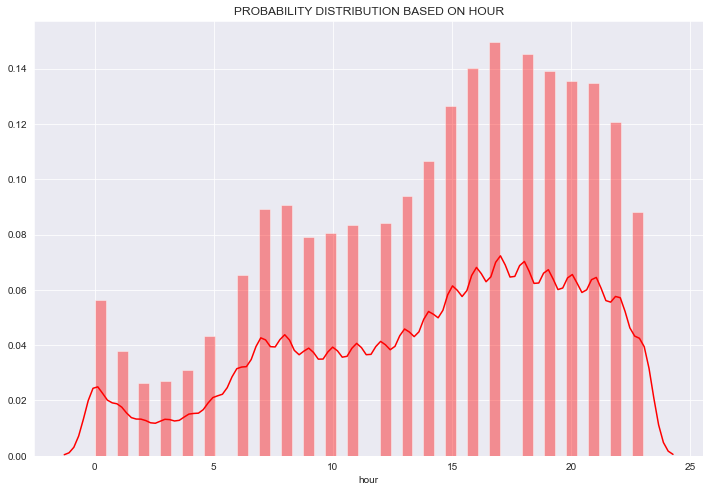

In [20]:
plt.figure(figsize=(12,8))
plt.title('PROBABILITY DISTRIBUTION BASED ON HOUR')
sns.distplot(df['hour'],color='red')
plt.show()

# LINE PLOT : TRIPS VS HOUR 

From the line plot we can infer that the maximum number of trips occurs from evening 4pm to night 10 pm.

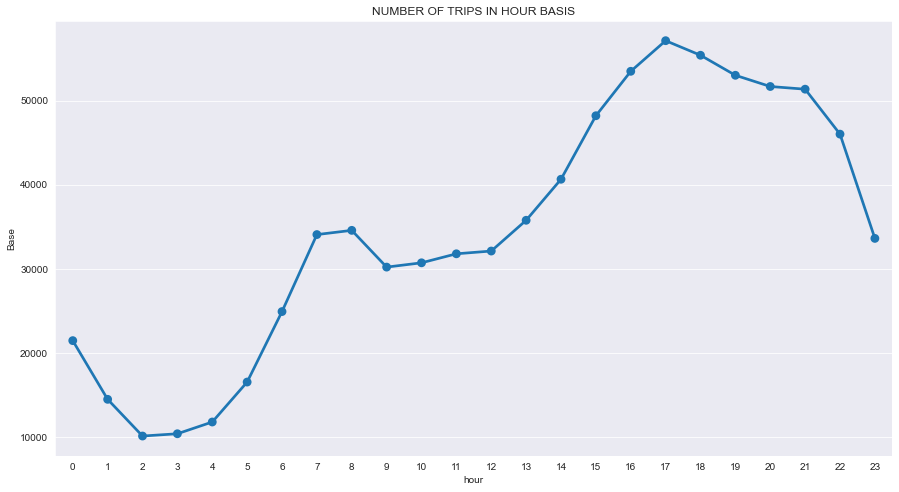

In [21]:
plt.figure(figsize=(15,8))
y=df.groupby(['hour']).count()['Base']
plt.title('NUMBER OF TRIPS IN HOUR BASIS')
sns.pointplot(x=y.reset_index()['hour'],y=y)
plt.show()

# BOX PLOT

TO GET AN ACCURATE DESCRIPTION OF TRIPS ,THE BOX PLOT TAKES HOUR,BASE AND WEEKDAYS INTO CONSIDERATION. THE MEDIAN OF TRIP TIME IS AROUND 3PM AND MAXIMUM TRIPS OCCUR AFTER 5.

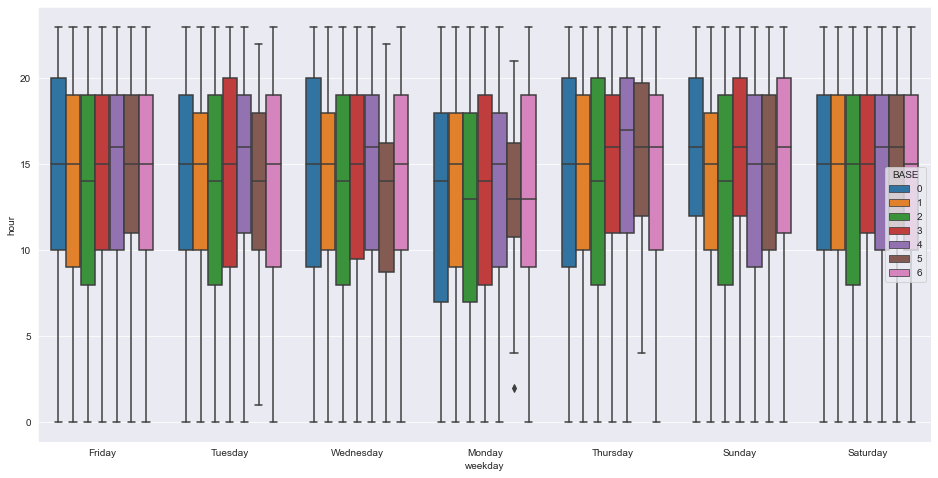

In [22]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['weekday'],y=df['hour'],hue=df['BASE'])
plt.show()

In [36]:
df['weekday'].value_counts()

Saturday     323550
Friday       319078
Sunday        70347
Thursday      32759
Wednesday     30495
Tuesday       28094
Monday        24952
Name: weekday, dtype: int64

# LINE PLOT : TRIPS VS HOUR (HUE= DAY)

IT IS OBVIOUS FROM THE GRAPH THAT FRIDAY AND SATURDAY HAS HIGHER NUMBER OF TRIPS.

4PM-10PM : THE TRIPS ON SATURDAYS AND FRIDAYS ARE 4 TIMES HIGHER WHEN COMPARED TO REST OF THE WEEK.

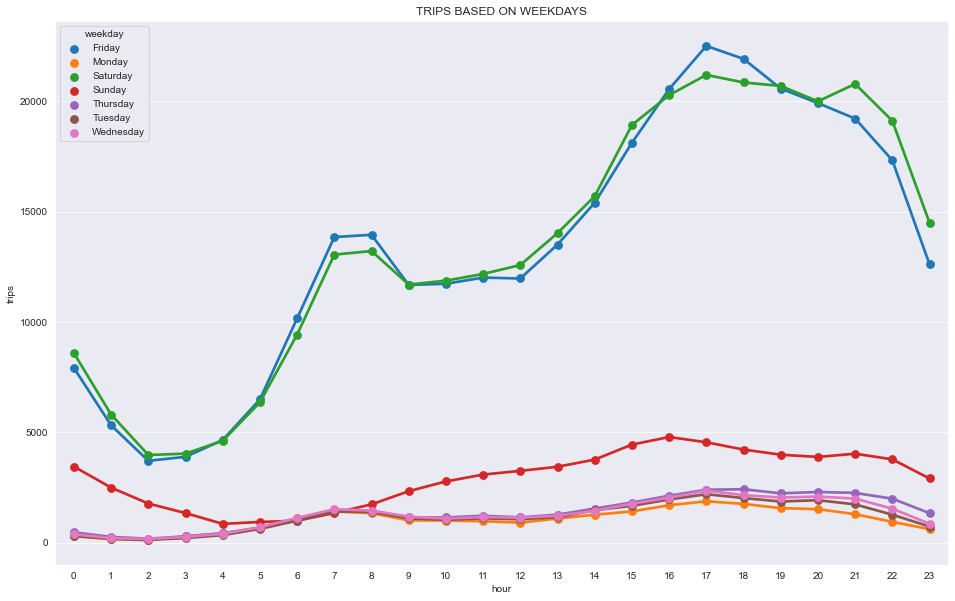

In [23]:
plt.figure(figsize=(16,10))
y=df.groupby(['hour','weekday'])['date'].count().reset_index()
plt.title('TRIPS BASED ON WEEKDAYS')
y['trips']=y['date']
sns.pointplot(x=y.hour,y=y.trips,hue=y.weekday)
plt.show()

In [24]:
df["BASE"].value_counts()

4    339123
1    281524
2    123711
6     45572
0     28516
3      8604
5      2225
Name: BASE, dtype: int64

# LINE PLOT : TRIPS VS HOUR (HUE= BASES)

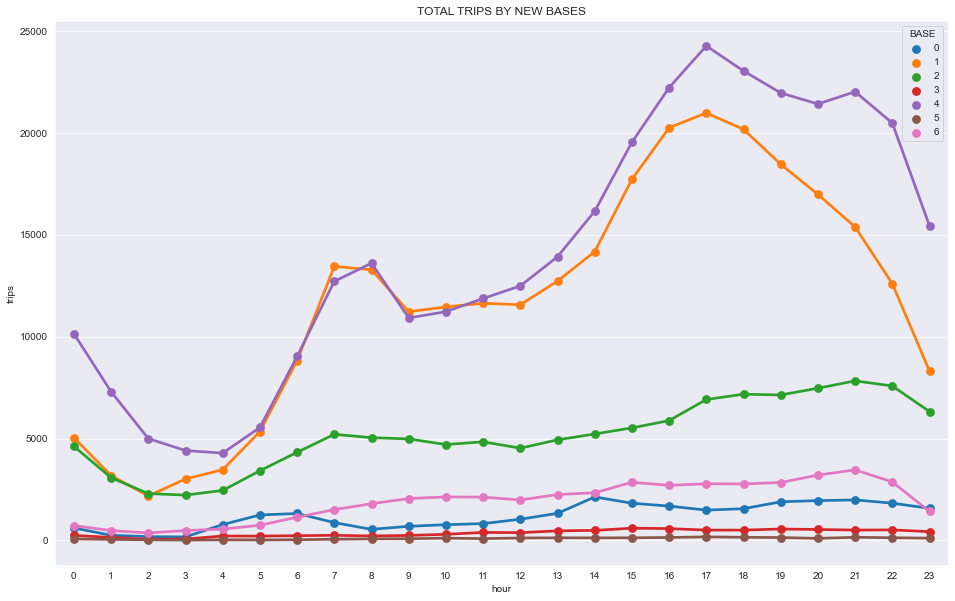

In [25]:
plt.figure(figsize=(16,10))
y=df.groupby(['hour','BASE'])['date'].count().reset_index()
plt.title('TOTAL TRIPS BY NEW BASES')
y['trips']=y['date']
sns.pointplot(x=y.hour,y=y.trips,hue=y.BASE)
plt.show()

# PIE CHART

The percentage of cab bookings in respective bases. 

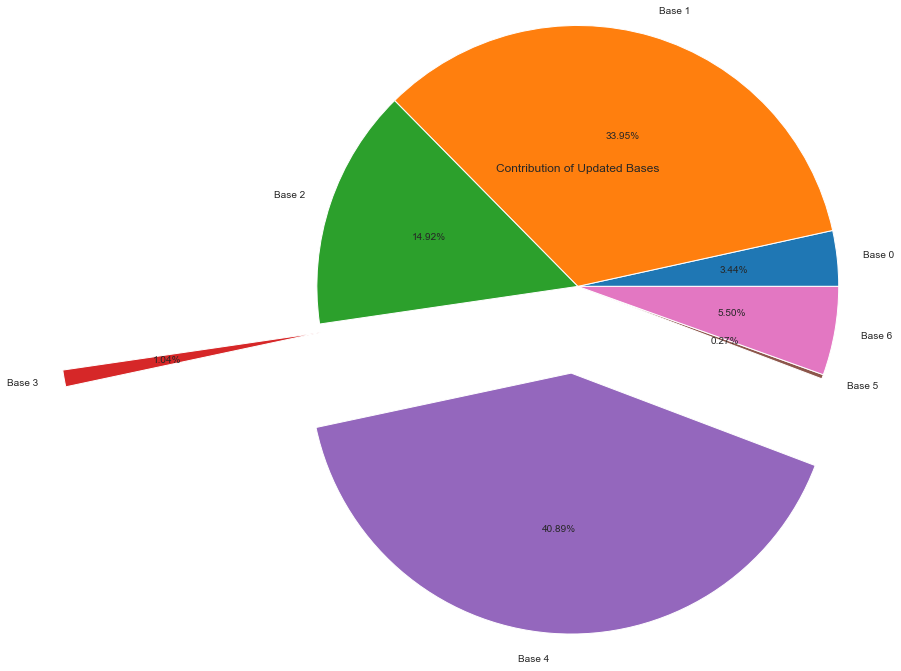

In [26]:
l=[]
for i in range(0,7):
    l.append(df.loc[df['BASE']==i].count()['hour'])
plt.title('Contribution of Updated Bases')
plt.pie(l,autopct='%0.2f%%',labels=['Base 0','Base 1','Base 2','Base 3','Base 4','Base 5','Base 6'],radius=3,
       explode=[0,0,0,0,0,0,0])
plt.show()